In [1]:
import pandas as pd
from pandas import Series, DataFrame


In [2]:
# https://www.kaggle.com/c/titanic/data
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Cabin missing a lot of values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# who are the passengers?
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


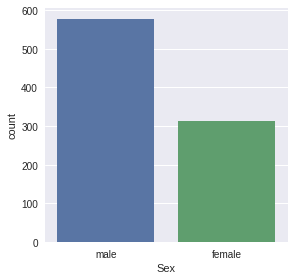

In [9]:
# A lot more males than females
sns.factorplot('Sex', data=titanic_df, kind='count')

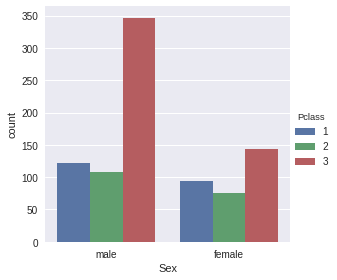

In [10]:
# but most of the males were in third class
sns.factorplot('Sex', data=titanic_df, kind='count', hue='Pclass')


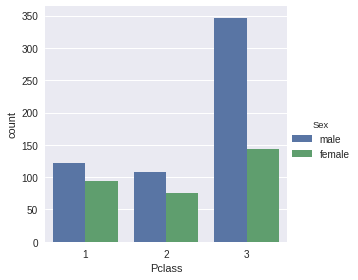

In [11]:
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='Sex')


In [13]:
def male_femail_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [16]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_femail_child, axis=1)
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


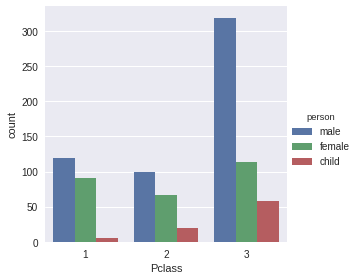

In [19]:
# a lot more children in 3rd class
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person')

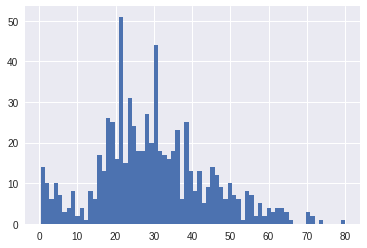

In [20]:
titanic_df['Age'].hist(bins=70)

In [22]:
titanic_df['Age'].mean()

29.69911764705882

In [23]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

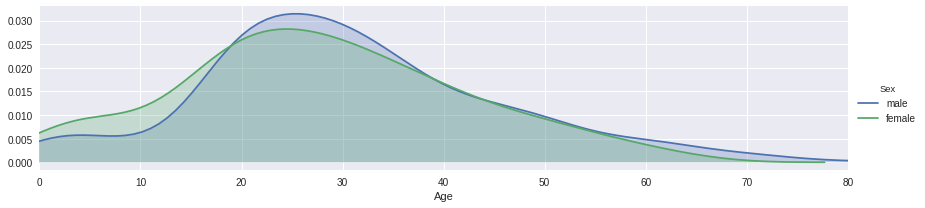

In [24]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()


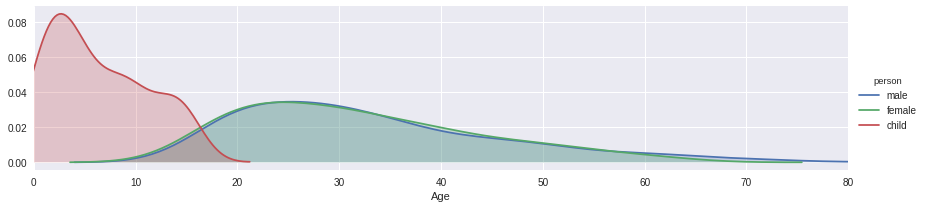

In [25]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

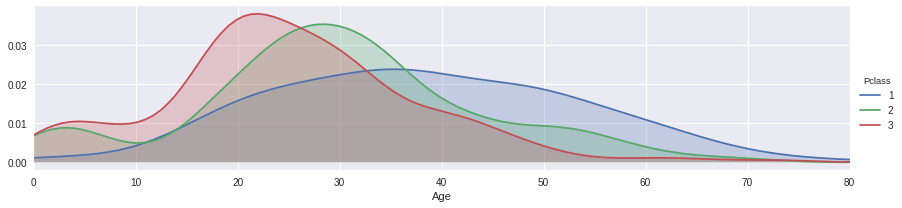

In [26]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

In [28]:
deck = titanic_df ['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

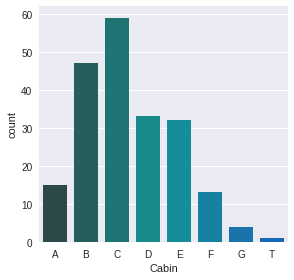

In [34]:
levels = []
for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df= cabin_df.sort_values('Cabin')
sns.factorplot('Cabin', data=cabin_df, kind='count', palette='winter_d')

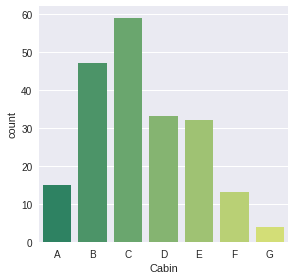

In [35]:
# remove T cabin
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin', data=cabin_df, kind='count', palette='summer')

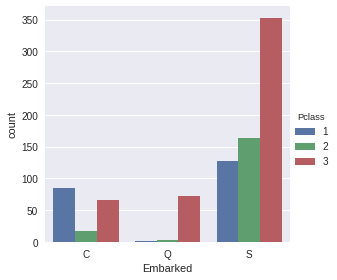

In [41]:
#  Port of Embarkation
# C = Cherbourg, Q = Queenstown, S = Southampton
# most 3rd class passengers embarked from Southhampton
sns.factorplot('Embarked', data=titanic_df, hue='Pclass', order=['C', 'Q', 'S'], kind='count')

In [45]:
# who was alone, who was with family?
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
# if Alone is not 0, then family
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
titanic_df.head()


/home/zahid/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


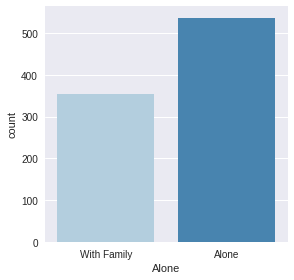

In [46]:
sns.factorplot('Alone', data=titanic_df, palette='Blues', kind='count')
# most people were alone

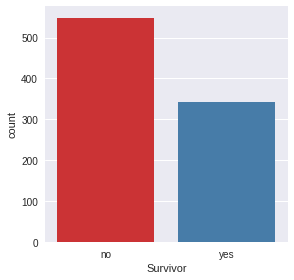

In [49]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

sns.factorplot('Survivor', data=titanic_df, kind='count', palette='Set1')

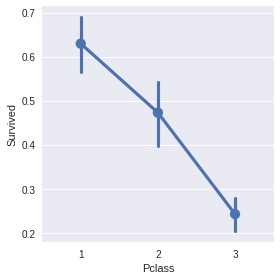

In [51]:
sns.factorplot('Pclass','Survived', data=titanic_df)

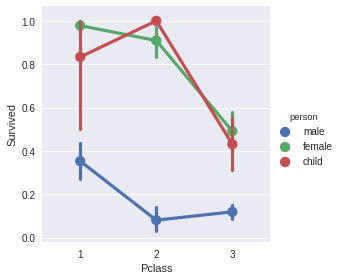

In [52]:
# males didn't do as well in all classes
sns.factorplot('Pclass','Survived', data=titanic_df, hue='person')

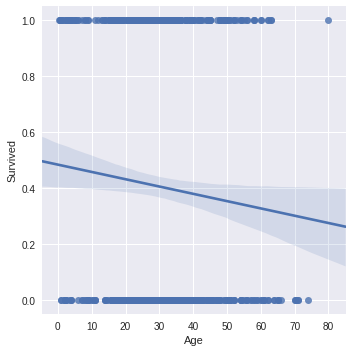

In [53]:
# the older the passenger, the less likely to survice
sns.lmplot('Age', 'Survived', data=titanic_df)

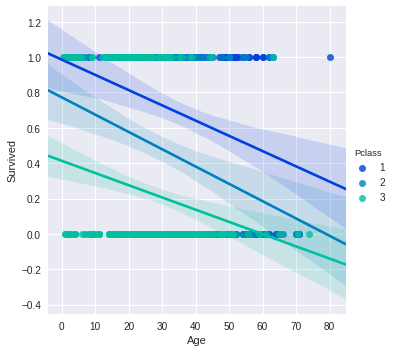

In [54]:
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter')

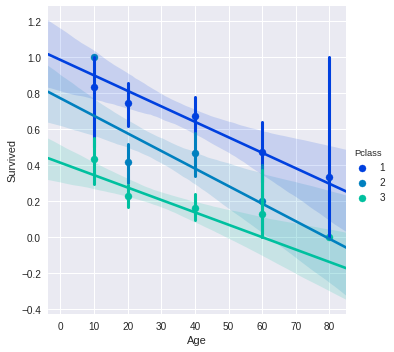

In [55]:
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter', x_bins=generations)

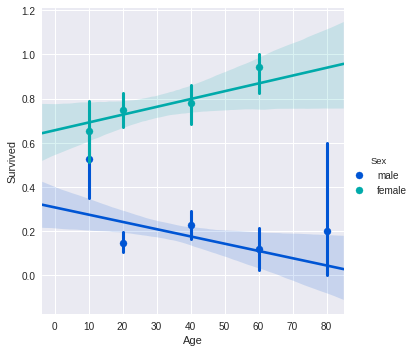

In [56]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

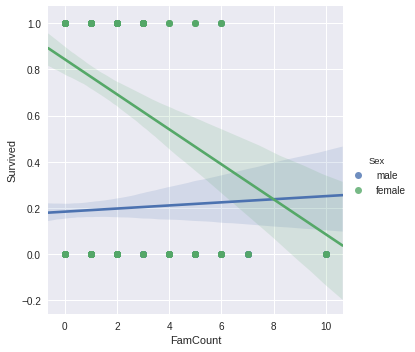

In [58]:
# Did size of your family have an effect on survival?
titanic_df['FamCount'] = titanic_df['SibSp'] + titanic_df['Parch']
sns.lmplot('FamCount','Survived',data=titanic_df,hue='Sex')